In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\N3ur0m0nk\\Documents\\LR7\\games.csv")

In [3]:
df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}, inplace=True)

In [4]:
df = df.drop([659, 14244])

In [5]:
df['year_of_release'].fillna(1979, inplace=True)

In [6]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [7]:
df['critic_score'].fillna(0, inplace=True)

In [8]:
df['user_score'].replace('tbd', 0, inplace=True)

In [9]:
df['user_score'].fillna(0, inplace=True)

In [10]:
df['user_score'] = df['user_score'].astype(float)

In [11]:
df['rating'].fillna('-', inplace=True)

In [12]:
df.insert(8, 'total_sales', df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])

In [13]:
total_year = df.pivot_table(index=['year_of_release'], values='name', aggfunc='count').sort_values('name', ascending = False)
total_year = total_year.reset_index()
total_year = total_year.drop(20)

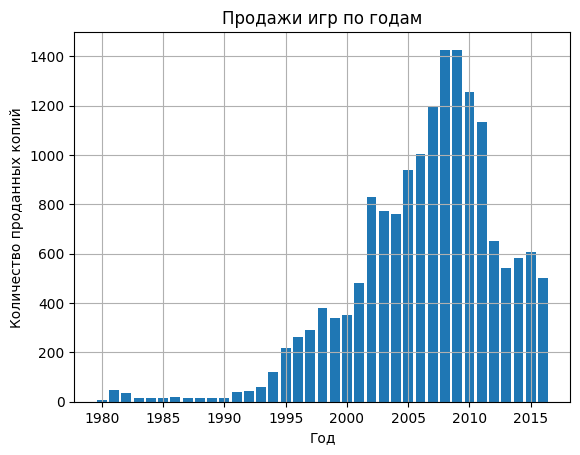

In [14]:
plt.grid()
plt.bar(total_year['year_of_release'], total_year['name'])
plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий')
plt.show()

In [15]:
platform_sales = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
platform_sales = platform_sales.reset_index()

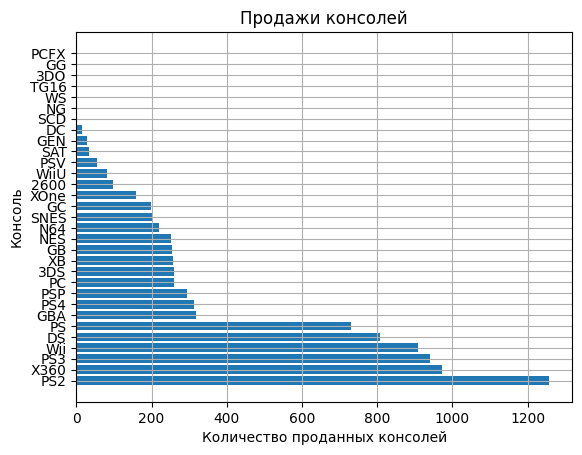

In [16]:
plt.grid()
plt.barh(platform_sales['platform'], platform_sales['total_sales'])
plt.title('Продажи консолей')
plt.ylabel('Консоль')
plt.xlabel('Количество проданных консолей')
plt.show()

In [17]:
box_total = np.zeros((2, len(platform_sales)))
for i in range(len(platform_sales)):
    box_total[0][i] = i
    box_total[1][i] = platform_sales['total_sales'].loc[i]
box_total

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 4.00000e+00,
        5.00000e+00, 6.00000e+00, 7.00000e+00, 8.00000e+00, 9.00000e+00,
        1.00000e+01, 1.10000e+01, 1.20000e+01, 1.30000e+01, 1.40000e+01,
        1.50000e+01, 1.60000e+01, 1.70000e+01, 1.80000e+01, 1.90000e+01,
        2.00000e+01, 2.10000e+01, 2.20000e+01, 2.30000e+01, 2.40000e+01,
        2.50000e+01, 2.60000e+01, 2.70000e+01, 2.80000e+01, 2.90000e+01,
        3.00000e+01],
       [1.25577e+03, 9.71420e+02, 9.39650e+02, 9.07510e+02, 8.06120e+02,
        7.30860e+02, 3.17850e+02, 3.14140e+02, 2.94050e+02, 2.59520e+02,
        2.59000e+02, 2.57740e+02, 2.55460e+02, 2.51050e+02, 2.18680e+02,
        2.00040e+02, 1.98930e+02, 1.59320e+02, 9.69800e+01, 8.21900e+01,
        5.40700e+01, 3.35900e+01, 2.83500e+01, 1.59500e+01, 1.86000e+00,
        1.44000e+00, 1.42000e+00, 1.60000e-01, 1.00000e-01, 4.00000e-02,
        3.00000e-02]])

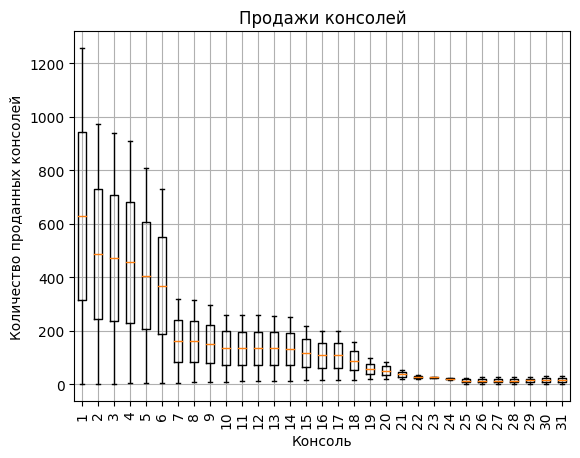

In [18]:
plt.grid()
plt.boxplot(box_total)
plt.xticks(rotation=90)
plt.title('Продажи консолей')
plt.xlabel('Консоль')
plt.ylabel('Количество проданных консолей')
plt.show()

In [19]:
game_genre = df.pivot_table(index=['genre'], values='name', aggfunc='count').sort_values('name', ascending=False)
game_genre = game_genre.reset_index()

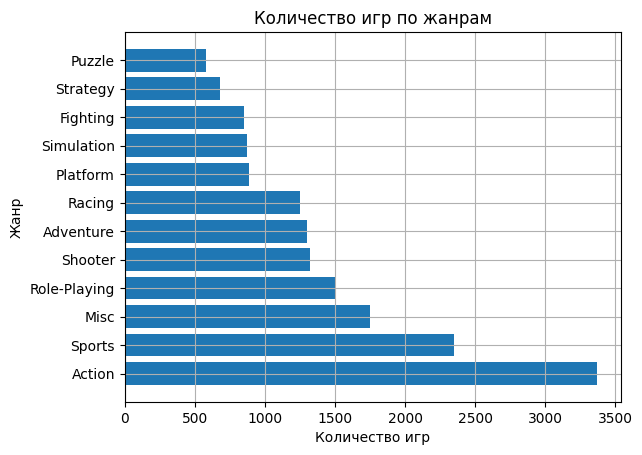

In [20]:
plt.grid()
plt.barh(game_genre['genre'], game_genre['name'])
plt.title('Количество игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.show()